# Text Classification

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Collection

In [ ]:
df=pd.read_csv('C:/Users/kumar/OneDrive/Desktop/Machine Learning Project/datasets/text classification on news dataset.csv')
df.shape

(12520, 2)

In [3]:
df.head()

,text,label
0,sing praise mahinda lose voice sri lanka disro...,1
1,kojc rally first time davao city appoint son god,1
2,bill gate people resist mrna tsunami exclude s...,1
3,cure covid19 forward budesonide asthma drug pl...,1
4,president trump form patriot party 81 day elec...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12520 entries, 0 to 12519
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    12520 non-null  object
 1   label   12520 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 195.8+ KB


In [5]:
df.describe()

,label
count,12520.000000
mean,0.558786
std,0.496552
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


## Preprocess Text Data



In [7]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Download necessary NLTK data if not already present
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except LookupError:
    nltk.download('wordnet')

print("Libraries imported and NLTK data checked/downloaded.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Libraries imported and NLTK data checked/downloaded.


In [8]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize text
    words = text.split()

    # Remove stopwords and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]

    # Join words back into a string
    return ' '.join(words)

# Apply the preprocessing function to the 'text' column
df['cleaned_text'] = df['text'].apply(preprocess_text)

print("Text preprocessing complete. Displaying first 5 rows with 'cleaned_text' column:")
print(df[['text', 'cleaned_text']].head())

Text preprocessing complete. Displaying first 5 rows with 'cleaned_text' column:
                                                text  \
0  sing praise mahinda lose voice sri lanka disro...   
1   kojc rally first time davao city appoint son god   
2  bill gate people resist mrna tsunami exclude s...   
3  cure covid19 forward budesonide asthma drug pl...   
4  president trump form patriot party 81 day elec...   

                                        cleaned_text  
0  sing praise mahinda lose voice sri lanka disro...  
1   kojc rally first time davao city appoint son god  
2  bill gate people resist mrna tsunami exclude s...  
3  cure covid forward budesonide asthma drug pls ...  
4  president trump form patriot party day electio...  


## Split Data into Training and Testing Sets



In [9]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df['cleaned_text']
y = df['label']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (10016,)
Shape of X_test: (2504,)
Shape of y_train: (10016,)
Shape of y_test: (2504,)


## Extract Text Features



In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer(max_features=5000) # Limiting features to manage complexity

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Shape of X_train_tfidf: {X_train_tfidf.shape}")
print(f"Shape of X_test_tfidf: {X_test_tfidf.shape}")

Shape of X_train_tfidf: (10016, 5000)
Shape of X_test_tfidf: (2504, 5000)


## Train Text Classification Model




In [11]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model using the TF-IDF transformed training data and training labels
model.fit(X_train_tfidf, y_train)

print("Multinomial Naive Bayes model trained successfully.")

Multinomial Naive Bayes model trained successfully.


## Evaluate Model Performance




In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

print("Evaluation libraries imported successfully.")

Evaluation libraries imported successfully.


Accuracy: 0.9145
Precision: 0.9145
Recall: 0.9145
F1 Score: 0.9145

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1105
           1       0.92      0.93      0.92      1399

    accuracy                           0.91      2504
   macro avg       0.91      0.91      0.91      2504
weighted avg       0.91      0.91      0.91      2504



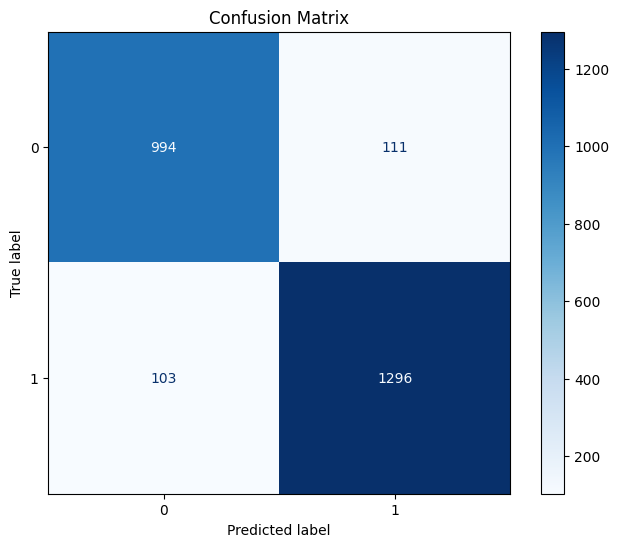

In [13]:
y_pred = model.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Confusion Matrix')
plt.show()
